# Download Data

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/geoai/blob/main/docs/examples/download_data.ipynb)

## Install Package
To use the `geoai-py` package, ensure it is installed in your environment. Uncomment the command below if needed.

In [ ]:
%pip install geoai-py

## Import Libraries
These modules allow downloading NAIP imagery and extracting building data statistics.

In [2]:
import leafmap
from geoai.download import (
    download_naip,
    download_overture_buildings,
    extract_building_stats,
)

## Define Bounding Box
Define the geographic extent (longitude and latitude) for data downloads.

In [ ]:
m = leafmap.Map(center=[47.6526, -117.5923], zoom=16)
m.add_basemap("Google Satellite")
m

Map(center=[47.6526, -117.5923], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

Use the drawing tools to draw a rectangle on the map. If no rectangle is drawn, the default ROI will be used.

In [ ]:
bbox = m.user_roi_bounds()
if bbox is None:
    bbox = (-117.6029, 47.65, -117.5936, 47.6563)

## Download NAIP Imagery
Fetch NAIP aerial imagery for the specified bounding box. The `max_items` parameter limits the number of downloaded files.

In [ ]:
# Download NAIP imagery for the specified region
downloaded_files = download_naip(
    bbox=bbox,
    output_dir="naip_data",
    max_items=1,
    # year=2020,
)

print(f"Downloaded {len(downloaded_files)} files.")

Found 1 NAIP items.


m_4711720_sw_11_060_20230701_20230911.tif: 100%|██████████| 342M/342M [00:59<00:00, 6.06MiB/s]

Successfully saved to naip_data/m_4711720_sw_11_060_20230701_20230911.tif
Downloaded 1 files.


## Download Building Data
Retrieve building footprint data in GeoJSON format within the bounding box. The `verbose` flag provides detailed output.

In [ ]:
# Download buildings
data_file = download_overture_buildings(
    bbox=bbox,
    output="buildings.geojson",
)

## Extract Building Statistics
If the building data file is successfully downloaded, extract and display relevant statistics such as area, count, and footprint details.

In [ ]:
stats = extract_building_stats(data_file)
print(stats)

{'total_buildings': 199, 'has_height': 84, 'has_name': 0, 'bbox': [-117.6017984, 47.650168297348685, -117.5937308, 47.655846]}


## Visualize Datasets

In [ ]:
m = leafmap.Map()
m.add_raster("naip_data/m_4711720_sw_11_060_20230701_20230911.tif", layer_name="NAIP")
m.add_geojson("buildings.geojson", layer_name="Buildings")
m

Map(center=[47.656247, -117.5938195], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

![image](https://github.com/user-attachments/assets/64475787-8ba1-4d12-8fe6-29fbb1dac2ed)

# 行星计算机

In [ ]:
import geoai

In [ ]:
collections = geoai.pc_collection_list()
collections

Retrieved 126 collections from Planetary Computer


id                                           title  \
42  3dep-lidar-classification                  USGS 3DEP Lidar Classification   
28            3dep-lidar-copc                     USGS 3DEP Lidar Point Cloud   
3              3dep-lidar-dsm           USGS 3DEP Lidar Digital Surface Model   
43             3dep-lidar-dtm           USGS 3DEP Lidar Digital Terrain Model   
41      3dep-lidar-dtm-native  USGS 3DEP Lidar Digital Terrain Model (Native)   
..                        ...                                             ...   
16               terraclimate                                    TerraClimate   
55                  us-census                                       US Census   
85                   usda-cdl                USDA Cropland Data Layers (CDLs)   
90       usgs-lcmap-conus-v13                 USGS LCMAP CONUS Collection 1.3   
91      usgs-lcmap-hawaii-v10                USGS LCMAP Hawaii Collection 1.0   

                                          description  
42  This collection is derived from the [USGS 3DEP...  
28  This collection contains source data from the ...  
3   This collection is derived from the [USGS 3DEP...  
43  This collection is derived from the [USGS 3DEP...  
41  This collection is derived from the [USGS 3DEP...  
..                                                ...  
16  [TerraClimate](http://www.climatologylab.org/t...  
55  The [2020 Census](https://www.census.gov/progr...  
85  The Cropland Data Layer (CDL) is a product of ...  
90  The [Land Change Monitoring, Assessment, and P...  
91  The [Land Change Monitoring, Assessment, and P...  

[126 rows x 3 columns]

No charts were generated by quickchart


In [ ]:

items = geoai.pc_stac_search(
    collection="naip",
    bbox=[-76.6657, 39.2648, -76.6478, 39.2724],  # Baltimore area
    time_range="2013-01-01/2014-12-31",
)
items

Found 1 items matching search criteria


[<Item id=md_m_3907643_se_18_1_20130917_20131112>]

In [ ]:
geoai.pc_item_asset_list(items[0])
geoai.view_pc_item(item=items[0])

In [ ]:
downloaded = geoai.pc_stac_download(
    items, output_dir="data", assets=["image", "thumbnail"]
)

Processing STAC item: md_m_3907643_se_18_1_20130917_20131112



Downloaded 2 assets for 1 items


In [ ]:
items = geoai.pc_stac_search(
    collection="chesapeake-lc-13",
    bbox=[-76.6657, 39.2648, -76.6478, 39.2724],  # Baltimore area
    time_range="2013-01-01/2014-12-31",
    max_items=10,
)
items

Found 1 items matching search criteria


[<Item id=Baywide_13Class_20132014_E1640000_N1970000>]

In [ ]:
geoai.pc_item_asset_list(items[0])
geoai.view_pc_item(item=items[0], colormap_name="tab10", basemap="SATELLITE")

In [ ]:
geoai.pc_stac_download(items[0], output_dir="data", assets=["data", "rendered_preview"])

Processing STAC item: Baywide_13Class_20132014_E1640000_N1970000



Downloaded 2 assets for 1 items


{'Baywide_13Class_20132014_E1640000_N1970000': {'data': 'data/Baywide_13Class_20132014_E1640000_N1970000_data.tif',
  'rendered_preview': 'data/Baywide_13Class_20132014_E1640000_N1970000_rendered_preview.png'}}

In [ ]:
ds = geoai.read_pc_item_asset(items[0], asset="data")

In [ ]:
ds

<xarray.DataArray (band: 1, y: 10000, x: 10000)> Size: 100MB
[100000000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 80kB 1.64e+06 1.64e+06 ... 1.65e+06 1.65e+06
  * y            (y) float64 80kB 1.98e+06 1.98e+06 ... 1.97e+06 1.97e+06
    spatial_ref  int64 8B 0
Attributes:
    DataType:            Generic
    AREA_OR_POINT:       Area
    RepresentationType:  THEMATIC
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [ ]:
items = geoai.pc_stac_search(
    collection="landsat-c2-l2",
    bbox=[-76.6657, 39.2648, -76.6478, 39.2724],  # Baltimore area
    time_range="2024-10-27/2024-12-31",
    query={"eo:cloud_cover": {"lt": 1}},
    max_items=10,
)

Found 1 items matching search criteria


In [ ]:
items

[<Item id=LC08_L2SP_015033_20241028_02_T1>]

In [ ]:
geoai.pc_item_asset_list(items[0])
geoai.view_pc_item(item=items[0], assets=["red", "green", "blue"])
geoai.view_pc_item(item=items[0], assets=["nir08", "red", "green"])


In [ ]:
geoai.view_pc_item(
    item=items[0],
    expression="(nir08-red)/(nir08+red)",
    rescale="-1,1",
    colormap_name="greens",
    name="NDVI Green",
)


In [ ]:
geoai.pc_item_asset_list(items[0])
geoai.view_pc_item(item=items[0], assets=["red", "green", "blue"])
geoai.view_pc_item(item=items[0], assets=["nir08", "red", "green"])
geoai.view_pc_item(
    item=items[0],
    expression="(nir08-red)/(nir08+red)",
    rescale="-1,1",
    colormap_name="greens",
    name="NDVI Green",
)
geoai.pc_stac_download(
    items[0], output_dir="data", assets=["nir08", "red", "green", "blue"]
)

Processing STAC item: LC08_L2SP_015033_20241028_02_T1



Downloaded 4 assets for 1 items


{'LC08_L2SP_015033_20241028_02_T1': {'red': 'data/LC08_L2SP_015033_20241028_02_T1_red.tif',
  'blue': 'data/LC08_L2SP_015033_20241028_02_T1_blue.tif',
  'green': 'data/LC08_L2SP_015033_20241028_02_T1_green.tif',
  'nir08': 'data/LC08_L2SP_015033_20241028_02_T1_nir08.tif'}}

# 元数据

In [ ]:
# -*- coding: utf-8 -*-
"""
地理空间数据元数据查看与分析示例
本脚本展示如何使用 geoai-py 库查看和分析地理空间数据的元数据
包括栅格数据(NAIP影像)和矢量数据(建筑物轮廓)的处理
"""

# 安装 geoai-py 库 (如果尚未安装，请取消下行注释)
# %pip install geoai-py

# 导入 geoai 库
import geoai

# 定义数据源URL
# raster_url: NAIP航空影像(栅格数据)
# vector_url: 建筑物轮廓数据(矢量数据)
raster_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train.tif"
)
vector_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train_buildings.geojson"

# 下载栅格数据(NAIP影像)并保存到本地
raster_path = geoai.download_file(raster_url)

# 下载矢量数据(建筑物轮廓)并保存到本地
vector_path = geoai.download_file(vector_url)



naip_train.tif: 100%|██████████| 12.1M/12.1M [00:00<00:00, 50.1MB/s]
naip_train_buildings.geojson: 100%|██████████| 456k/456k [00:00<00:00, 6.20MB/s]


In [ ]:
# 查看栅格数据的波段统计信息(最小值、最大值、平均值等)
band_stats = geoai.get_raster_info(raster_path)["band_stats"]
print("栅格数据波段统计信息:")
print(band_stats)

栅格数据波段统计信息:
[{'band': 1, 'min': 12.0, 'max': 251.0, 'mean': 150.6730747259594, 'std': 48.01908734374099}, {'band': 2, 'min': 49.0, 'max': 251.0, 'mean': 141.92468895229808, 'std': 43.46595463573497}, {'band': 3, 'min': 53.0, 'max': 251.0, 'mean': 120.89909373405554, 'std': 41.78086244480775}, {'band': 4, 'min': 22.0, 'max': 251.0, 'mean': 159.68995855062735, 'std': 54.95588423977727}]



栅格数据完整元数据:
===== RASTER INFORMATION: naip_train.tif =====
Driver: GTiff
Dimensions: 2503 x 1126 pixels
Number of bands: 4
Data type: uint8
Coordinate Reference System: EPSG:26911
Georeferenced Bounds: BoundingBox(left=454780.8, bottom=5277567.0, right=456282.6, top=5278242.6)
Pixel Resolution: 0.5999999999999953, 0.5999999999996691
NoData Value: None

----- Band Statistics -----
Band 1:
  Min: 12.00
  Max: 251.00
  Mean: 150.67
  Std Dev: 48.02
Band 2:
  Min: 49.00
  Max: 251.00
  Mean: 141.92
  Std Dev: 43.47
Band 3:
  Min: 53.00
  Max: 251.00
  Mean: 120.90
  Std Dev: 41.78
Band 4:
  Min: 22.00
  Max: 251.00
  Mean: 159.69
  Std Dev: 54.96


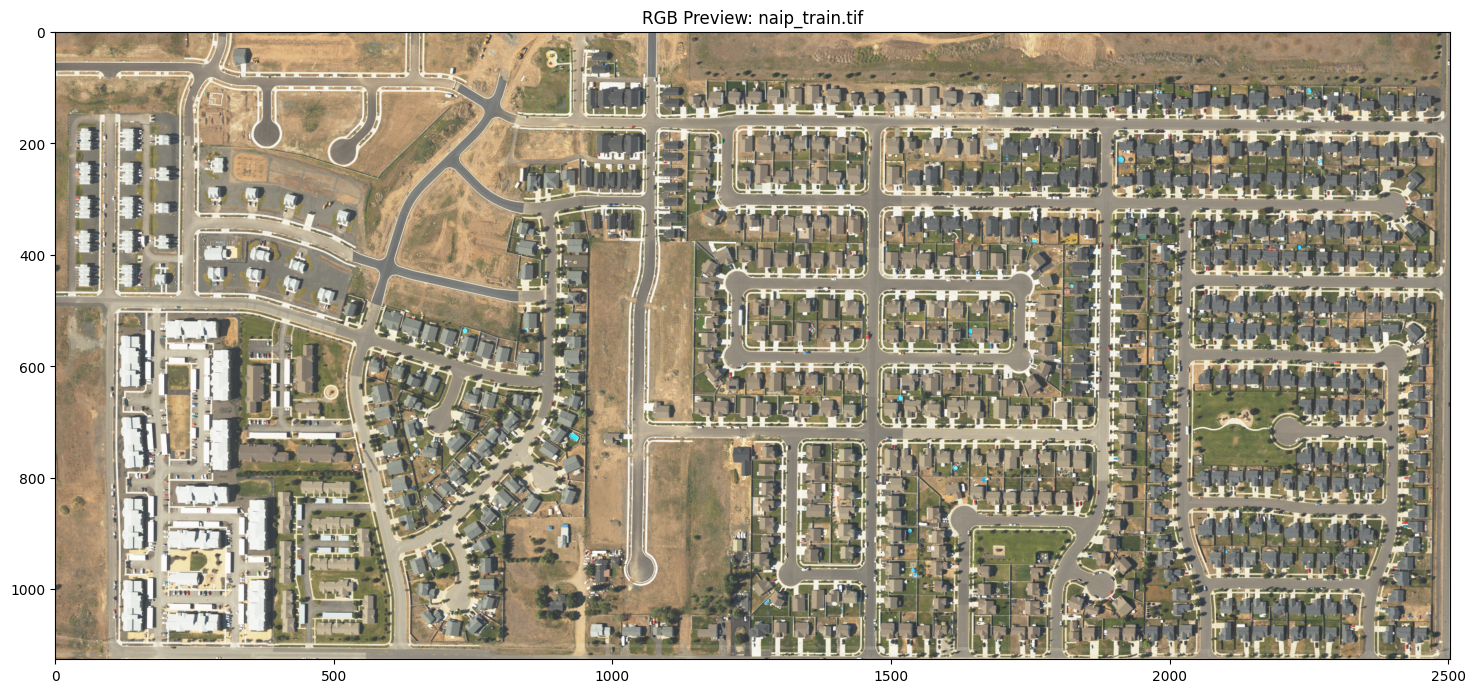

In [ ]:
# 打印栅格数据的完整元数据(尺寸、分辨率、投影、波段信息等)
print("\n栅格数据完整元数据:")
geoai.print_raster_info(raster_path, figsize=(18, 10))


矢量数据元数据:
===== VECTOR INFORMATION: naip_train_buildings.geojson =====
Driver: GEOJSON
Feature count: 722
Geometry types: {'Polygon': 722}
Coordinate Reference System: EPSG:4326
Bounds: [-117.6017984, 47.65016239407519, -117.58246913360121, 47.655846]
Number of attributes: 8
Attribute names: id, version, sources, subtype, class, height, has_parts, is_underground

----- Attribute Statistics -----
Attribute: version
  min: 0
  max: 0
  mean: 0.0000
  std: 0.0000
  null_count: 0
Attribute: height
  min: 2.0198
  max: 6.3780
  mean: 4.9893
  std: 0.8086
  null_count: 397


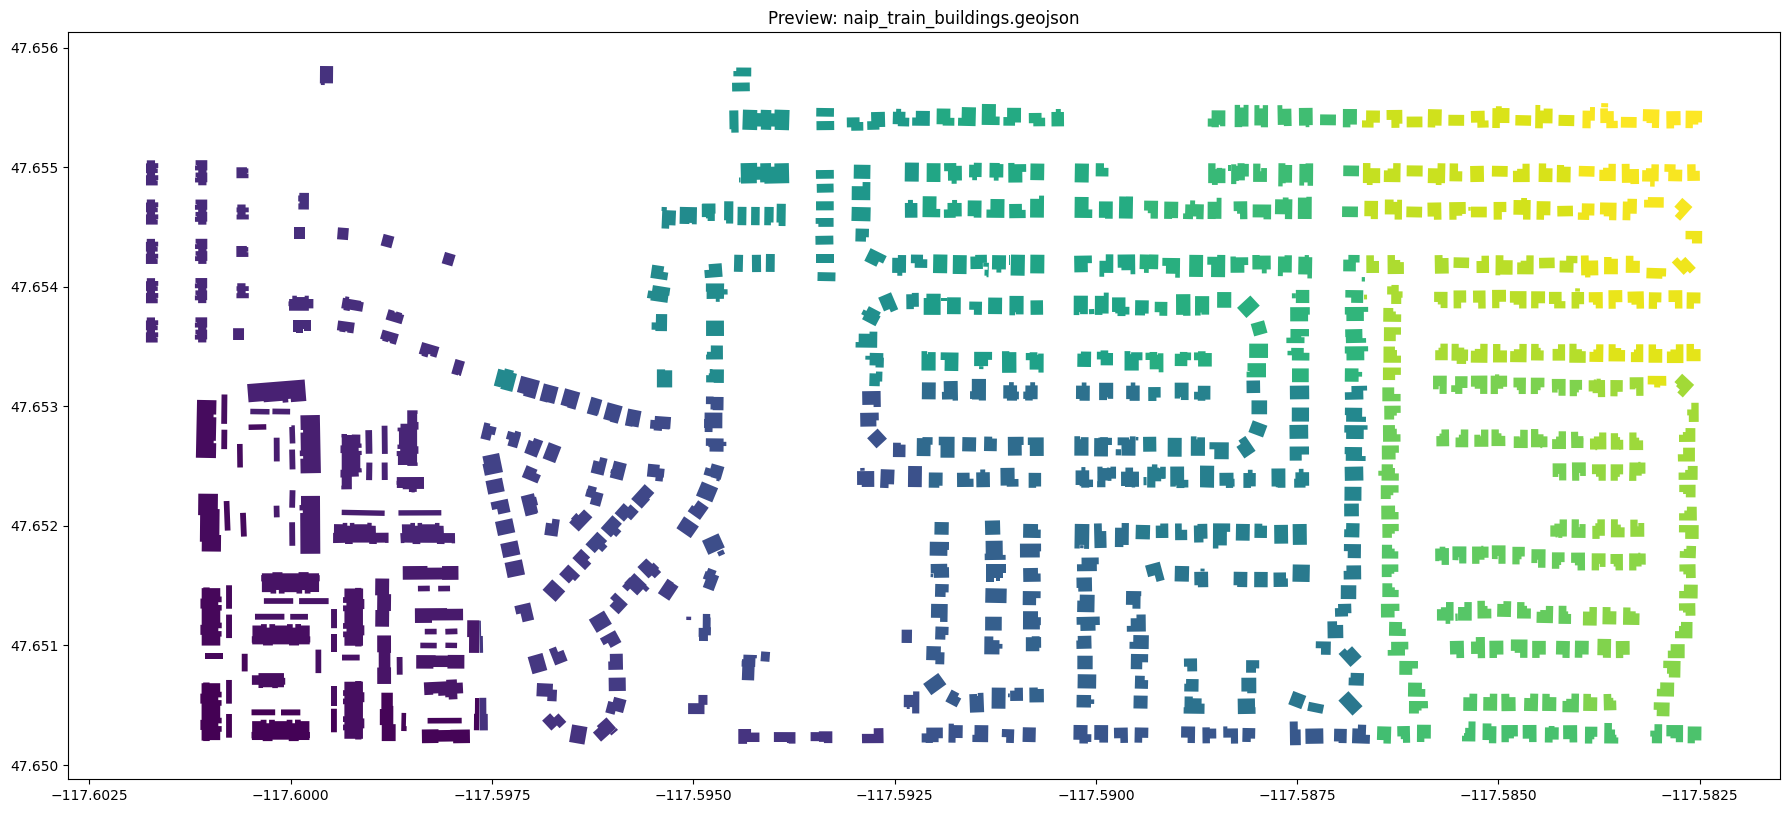

In [ ]:
# 打印矢量数据的元数据(几何类型、要素数量、空间范围、属性字段等)
print("\n矢量数据元数据:")
geoai.print_vector_info(vector_path, figsize=(18, 10))


分析建筑物高度属性:


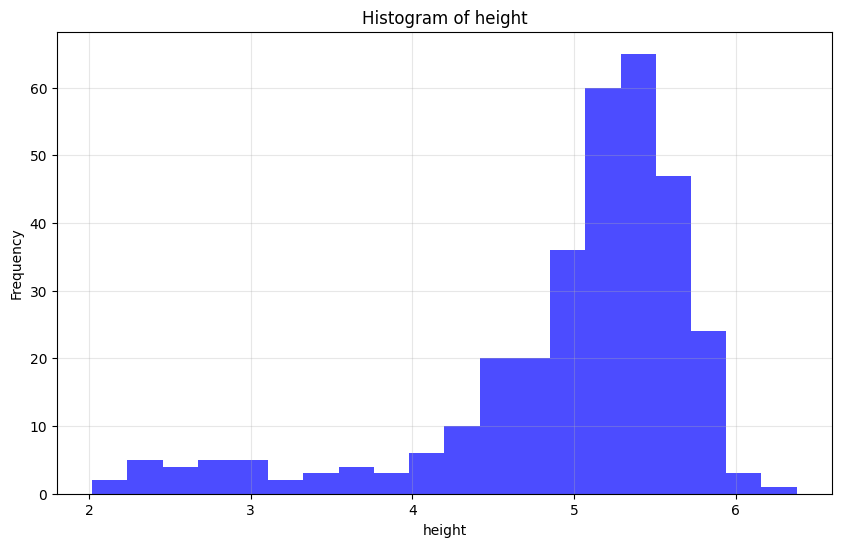

{'attribute': 'height', 'type': 'numeric', 'count': np.int64(325), 'null_count': np.int64(397), 'min': 2.0197694, 'max': 6.3780174, 'mean': np.float64(4.989292356615385), 'median': 5.2050776, 'std': 0.8086136381053565, 'unique_values': 325}


In [ ]:
# 分析矢量数据中的"height"(高度)属性，生成统计摘要和分布图表
print("\n分析建筑物高度属性:")
height_analysis = geoai.analyze_vector_attributes(vector_path, "height")
print(height_analysis)


根据高度可视化建筑物:


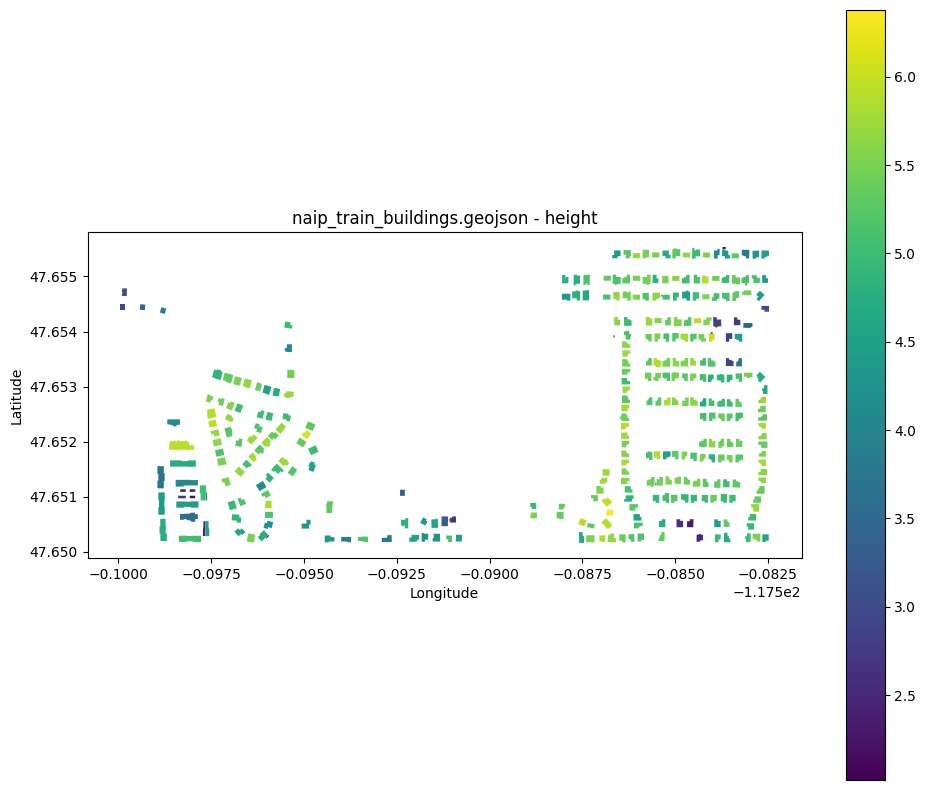

In [ ]:
# 创建可视化，根据建筑物高度属性进行着色，直观展示空间分布
print("\n根据高度可视化建筑物:")
geoai.visualize_vector_by_attribute(vector_path, "height")

In [ ]:
# 裁剪栅格数据
# 参数说明:
# - raster_path: 输入栅格文件路径
# - clip_raster_path: 输出裁剪后的文件路径
# - bbox: 裁剪区域的边界框坐标(左上角x,y和右下角x,y)
# - bands: 要包含的波段(1,2,3通常对应红、绿、蓝三个波段)
# - bbox_type: 指定边界框坐标类型(像素坐标而非地理坐标)
clip_raster_path = "naip_clip.tif"
print(f"\n裁剪栅格数据并保存到: {clip_raster_path}")
geoai.clip_raster_by_bbox(
    raster_path,
    clip_raster_path,
    bbox=(0, 0, 500, 500),  # 裁剪前500x500像素的区域
    bands=[1, 2, 3],        # 保留RGB三个波段
    bbox_type="pixel",      # 使用像素坐标系
)



裁剪栅格数据并保存到: naip_clip.tif


'naip_clip.tif'


显示裁剪后的影像:


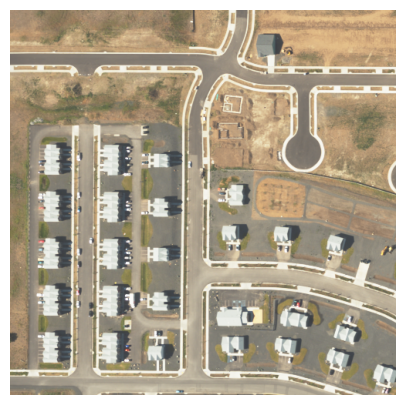


处理完成!


In [ ]:
# 显示裁剪后的影像
print("\n显示裁剪后的影像:")
geoai.view_image(clip_raster_path)

print("\n处理完成!")

# 创建向量


In [3]:
# -*- coding: utf-8 -*-
"""
创建用于训练深度学习模型的矢量标签
本脚本展示如何使用 geoai-py 库创建地理空间矢量数据作为深度学习模型的标签
"""

# 安装 geoai-py 库 (如果尚未安装，请取消下行注释)
# %pip install geoai-py

# 导入 geoai 库
import geoai

# 创建一个 MapLibre 地图实例，使用 liberty 样式
m = geoai.MapLibre(style="liberty")

# 定义栅格数据源URL (NAIP航空影像)
raster_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train.tif"
)
# 将云优化地理影像(COG)添加到地图上
m.add_cog_layer(raster_url, name="NAIP")

# 添加图层控制器，允许用户切换不同图层的显示
m.add_layer_control()

# 添加绘图控制器，允许用户在地图上绘制点、多边形、线等几何要素
# controls参数指定可用的绘图工具，position参数指定控制器在地图上的位置
m.add_draw_control(
    controls=["point", "polygon", "line_string", "trash"], position="top-right"
)


In [ ]:


# 设置矢量数据的默认属性
# 这些属性将与用户绘制的几何要素关联
properties = {
    "Type": ["Residential", "Commercial", "Industrial"],  # 下拉选择项
    "Area": 3000,                                         # 数值
    "Name": "Building",                                   # 文本
    "City": "Seattle",                                    # 文本
}

# 创建矢量数据创建界面
# m: 地图实例
# properties: 要素属性
# file_ext: 输出文件格式 (gpkg = GeoPackage)
widget = geoai.create_vector_data(m, properties, file_ext="gpkg")

# 显示交互式小部件
# 在PyCharm中，这行代码可能需要在Jupyter环境下才能正常显示
# 如果在普通Python脚本中运行，可能不会显示交互式界面
widget

# 注: 运行此脚本后，用户可以在交互式地图上:
# 1. 绘制几何要素(点、线、多边形)
# 2. 为每个要素填写属性
# 3. 将创建的矢量数据保存为GeoPackage格式
# 这些矢量数据可用作深度学习模型的训练标签
